# Capstone 1: The Fight Against Malaria
### Data Wrangling and EDA

In [86]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')
import scipy.stats as stats
from functools import reduce 
%matplotlib inline

There are several relevant csv files which will need to be imported, cleaned, and comnbined before it is possible to proceed with advanced analysis.

In breif they are as follows:

1) Population
    - population of each country by year
2) Cases
    - reported cases divided by country and year
3) Measured deaths
    - number of reported deaths divided by country and year
4) Resistance
    - indicator of whether or not treatment resistant species of malaria have been reported in a country
5) Net distribution
    - Distribution numbers for insect repellant nets with relevant country and date
6) Temperature
    - average temperature divided by country and year from the World Bank
7) Rainfall
    - average rainfall data divided by country and year from the World Bank
8) Percentage Aggricultural Land
     - As a surogate marker for outdor occupation.
9) Percent urban population
    - as a percentage of the total population that is in an urban environment.
10) Population density

*(more indepth descriptions of the files, their origins, and the field they include can be found in the supporting documents)*

### Importing the Data

In [87]:
# Import Relevant CSV Files
pop = pd.read_csv('data/population/population_total.csv')
cases = pd.read_csv('data/Originals/reported_indigenous_confirmed_cases.csv')
m_deaths = pd.read_csv('data/Originals/reported_deaths.csv')
resistance = pd.read_csv('data/Originals/insecticide_resistance.csv')
net_dist = pd.read_csv('data/Originals/amf_distributions.csv') 
temp = pd.read_csv('data/temperature/temp.csv')
rain = pd.read_csv('data/rain/rain.csv')
percent_agg = pd.read_csv('data/aggricultural land/percent_agg_land.csv')
gdp = pd.read_csv('data/GDP/gdp_per_capita.csv')
pop_density = pd.read_csv('data/population density/population_density.csv')
urb_pop = pd.read_csv('data/urban_population/urban_population.csv')
incidence = pd.read_csv('data/IHME-incidence.csv')

# Data Wrangling and EDA

### Incidence Data

In [88]:
incidence.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Incidence,Guam,Both,All Ages,Malaria,Number,1990.0,0.0000,0.0000,0.0000
1,Incidence,Guam,Both,All Ages,Malaria,Rate,1990.0,0.0000,0.0000,0.0000
2,Incidence,Wakayama,Both,All Ages,Malaria,Number,1990.0,0.0000,0.0000,0.0000
3,Incidence,Wakayama,Both,All Ages,Malaria,Rate,1990.0,0.0000,0.0000,0.0000
4,Incidence,Gabon,Both,All Ages,Malaria,Number,1990.0,289091.0233,444815.6217,201387.8442


In [89]:
incidence = incidence[incidence.metric == 'Rate']

In [90]:
incidence = incidence.rename(columns={'location' : 'country_name_x',
                                       'val' : 'incidence'})
incidence = incidence[['country_name_x', 'year', 'incidence']]

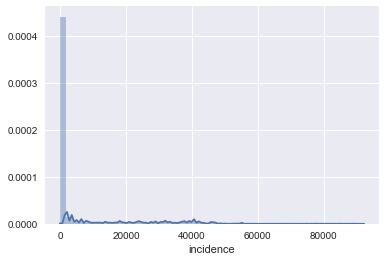

In [91]:
sns.distplot(incidence['incidence']);

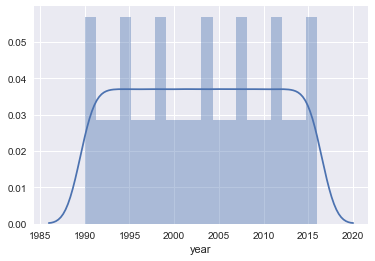

In [92]:
sns.distplot(incidence['year']);

## Reported Cases of Diagnosed Malaria

In [93]:
cases.columns

Index(['GHO (CODE)', 'GHO (DISPLAY)', 'GHO (URL)', 'PUBLISHSTATE (CODE)',
       'PUBLISHSTATE (DISPLAY)', 'PUBLISHSTATE (URL)', 'YEAR (CODE)',
       'YEAR (DISPLAY)', 'YEAR (URL)', 'REGION (CODE)', 'REGION (DISPLAY)',
       'REGION (URL)', 'COUNTRY (CODE)', 'COUNTRY (DISPLAY)', 'COUNTRY (URL)',
       'Display Value', 'Numeric', 'Low', 'High', 'Comments'],
      dtype='object')

In [94]:
# renaming columns
cases = cases.rename(columns={'YEAR (CODE)':'year',
                    'REGION (CODE)':'region',
                    'COUNTRY (CODE)':'country_code',
                    'REGION (CODE)' : 'region',
                     'COUNTRY (DISPLAY)' : 'country_name',         
                    'Numeric':'reported_cases'})

# selecting relevant columns
cases = cases[['year', 'country_code', 'reported_cases', 'region']]

# examining the df
print('Years from:', '', cases['year'].min(), '-', cases['year'].max())
print(cases.isnull().any())
print(cases.head())
print(cases.info())

Years from:  2000 - 2014
year              False
country_code      False
reported_cases    False
region            False
dtype: bool
   year country_code  reported_cases region
0  2001          EGY             0.0    EMR
1  2003          EGY             0.0    EMR
2  2013          IRQ             0.0    EMR
3  2004          OMN             0.0    EMR
4  2012          SYR             0.0    EMR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
year              1392 non-null int64
country_code      1392 non-null object
reported_cases    1392 non-null float64
region            1392 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 43.6+ KB
None


In [95]:
# grouping data by year value for trend plotting
cases_sum = cases.groupby('year').sum()

In [96]:
cases_sum.head(10)

,reported_cases
year,
2000,7782615.8
2001,6929445.2
2002,7926897.5
2003,10673614.1
2004,10687696.0
2005,12181704.0
2006,12023237.0
2007,13769700.0
2008,14161401.0


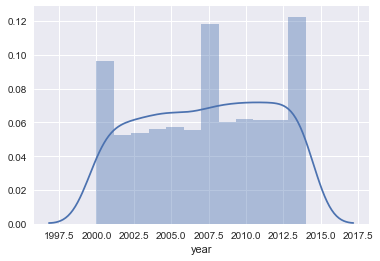

In [97]:
sns.distplot(cases['year'])

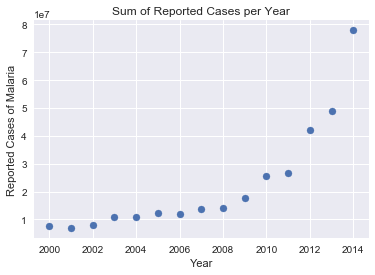

In [98]:
# plotting the sum of deaths per year
plt.scatter(cases_sum.index, cases_sum['reported_cases'])
plt.xlabel('Year')
plt.ylabel('Reported Cases of Malaria')
plt.title('Sum of Reported Cases per Year');

From this we can see that cases of malaria have been increasing in span from 2000 to 2014.

In [99]:
# grouping by region
cases_by_region = cases.groupby(['region', 'year']).sum()
cases_by_region.head()


reported_cases
region year                
AFR    2000       1383633.8
       2001       2356596.2
       2002       3290639.5
       2003       5492411.1
       2004       5881545.0

In [100]:
# returning the data to a useable format
cases_by_region = cases_by_region.reset_index()
cases_by_region.head()


,region,year,reported_cases
0,AFR,2000,1383633.8
1,AFR,2001,2356596.2
2,AFR,2002,3290639.5
3,AFR,2003,5492411.1
4,AFR,2004,5881545.0


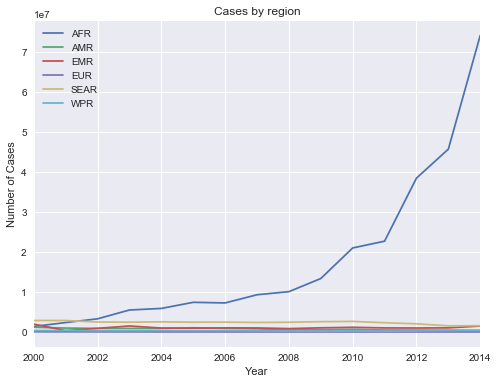

In [101]:
# plotting the regional data
ax = None
for group in cases_by_region.groupby('region'):
    ax = group[1].plot(x='year', y='reported_cases', figsize=(8,6), ax=ax)
ax.legend(cases_by_region['region'].unique())
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cases')
ax.set_title('Cases by region')
plt.show()

Here we can see that Africa is responsible for the overall trend observed above.

In [102]:
# taking a closer look at africa
africa = cases[(cases['region'] == 'AFR')]
africa_by_country = africa.groupby(['country_code', 'year']).sum()
africa_by_country = africa_by_country.reset_index()
africa_by_country.head()


,country_code,year,reported_cases
0,AGO,2005,889572.0
1,AGO,2006,1082398.0
2,AGO,2007,1533485.0
3,AGO,2008,1377992.0
4,AGO,2009,1573422.0


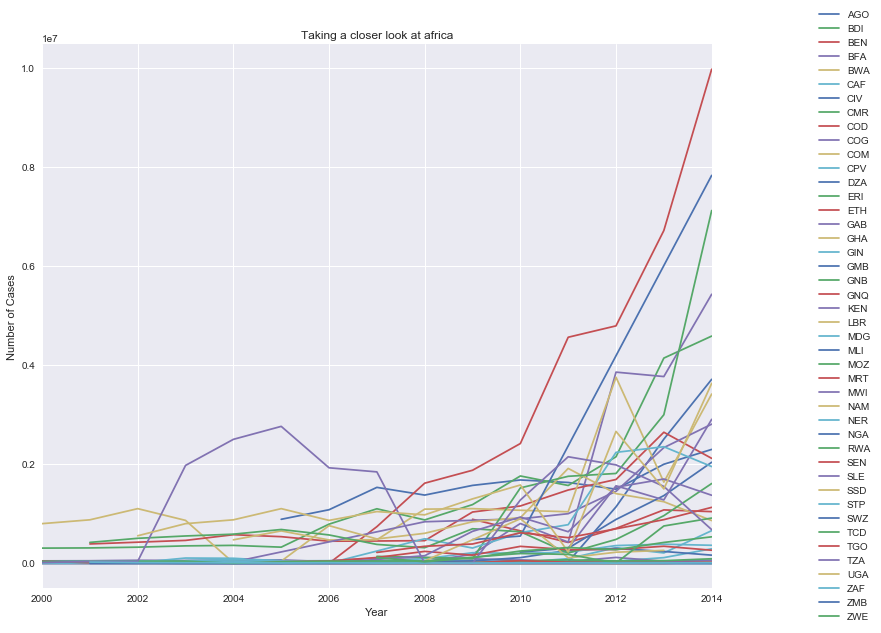

In [103]:
# plotting the african countries
case_countries = africa_by_country.country_code.unique()
ax1 = None
for group in africa_by_country.groupby('country_code'):
    ax1 = group[1].plot(x='year', y='reported_cases', figsize=(12,10), ax=ax1)
ax1.legend(case_countries, loc='center right', bbox_to_anchor=(1.25, 0.5))
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Cases')
ax1.set_title('Taking a closer look at africa')
plt.show()

In [104]:
# pulling out the top 5 African countries with the highest reported cases
AFR2014 = africa_by_country[(africa_by_country['year'] == 2014)]
print(AFR2014.sort_values(["reported_cases"], ascending=False).head(5))

    country_code  year  reported_cases
93           COD  2014       9968983.0
330          NGA  2014       7826954.0
289          MOZ  2014       7117648.0
40           BFA  2014       5428655.0
24           BDI  2014       4585273.0


## Mortality Data

In [105]:
m_deaths.columns

Index(['GHO (CODE)', 'GHO (DISPLAY)', 'GHO (URL)', 'PUBLISHSTATE (CODE)',
       'PUBLISHSTATE (DISPLAY)', 'PUBLISHSTATE (URL)', 'YEAR (CODE)',
       'YEAR (DISPLAY)', 'YEAR (URL)', 'REGION (CODE)', 'REGION (DISPLAY)',
       'REGION (URL)', 'COUNTRY (CODE)', 'COUNTRY (DISPLAY)', 'COUNTRY (URL)',
       'Display Value', 'Numeric', 'Low', 'High', 'Comments'],
      dtype='object')

In [106]:
# renaming columns
m_deaths = m_deaths.rename(columns={'YEAR (CODE)':'year',
                    'REGION (CODE)':'region',
                    'COUNTRY (CODE)':'country_code',
                    'Numeric':'reported_deaths'})

# selecting relevant columns
m_deaths = m_deaths[['year', 'country_code','reported_deaths', 'region']]

# examining the df
print('Years from:', '', m_deaths['year'].min(), '-', m_deaths['year'].max())
print(m_deaths.isnull().any())
print(m_deaths.head())
print(m_deaths.info())

Years from:  2000 - 2014
year               False
country_code       False
reported_deaths    False
region             False
dtype: bool
   year country_code  reported_deaths region
0  2008          DZA              0.0    AFR
1  2012          DZA              0.0    AFR
2  2014          DZA              0.0    AFR
3  2001          CPV              0.0    AFR
4  2013          CPV              0.0    AFR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 4 columns):
year               1408 non-null int64
country_code       1408 non-null object
reported_deaths    1408 non-null float64
region             1408 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 44.1+ KB
None


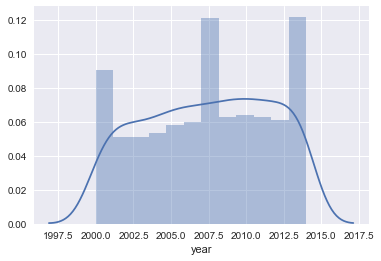

In [107]:
sns.distplot(m_deaths['year'])

In [108]:
# grouping data by year
deaths_sum = m_deaths.groupby('year').sum()
deaths_sum.head(10)

,reported_deaths
year,
2000,88222.0
2001,112615.0
2002,119338.0
2003,161581.0
2004,122025.0
2005,144366.0
2006,144514.0
2007,108011.0
2008,109122.0


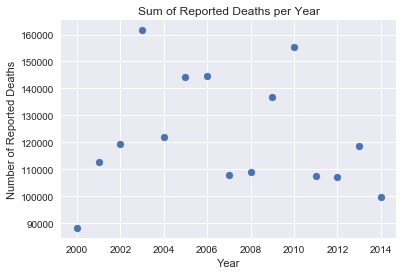

In [109]:
# plotting summarized yearly data
plt.scatter(deaths_sum.index, deaths_sum['reported_deaths'])
plt.xlabel('Year')
plt.ylabel('Number of Reported Deaths')
plt.title('Sum of Reported Deaths per Year');

Here it is possible to see that mortality is more variable from year to year than the cases of malaria. It does look as though we can see an overall trend slighthly downward in the number of deaths.

In [110]:
# grouping deaths by region
deaths_by_region = m_deaths.groupby(['region', 'year']).sum()
deaths_by_region.head()

reported_deaths
region year                 
AFR    2000          77642.0
       2001         103036.0
       2002         110516.0
       2003         152657.0
       2004         114045.0

In [111]:
deaths_by_region = deaths_by_region.reset_index()
deaths_by_region.head()

,region,year,reported_deaths
0,AFR,2000,77642.0
1,AFR,2001,103036.0
2,AFR,2002,110516.0
3,AFR,2003,152657.0
4,AFR,2004,114045.0


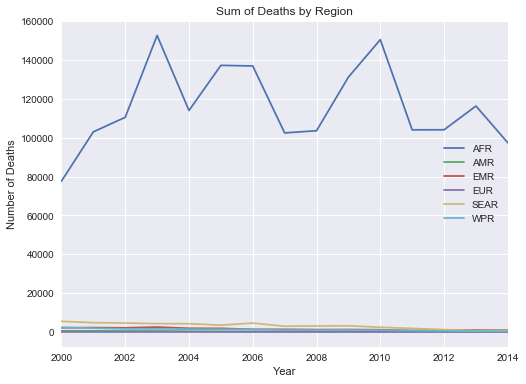

In [112]:
# plotting the regional data 
ax = None
for group in deaths_by_region.groupby('region'):
    ax = group[1].plot(x='year', y='reported_deaths', figsize=(8,6), ax=ax)
ax.legend(cases_by_region['region'].unique())
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.set_title('Sum of Deaths by Region')
plt.show()

Not suprisingly we can see that africa also has, by far, the most malaria related deaths.

In [113]:
# selecting out africa data
africa_deaths = m_deaths[(m_deaths['region'] == 'AFR')]
africa_deaths_by_country = africa_deaths.groupby(['country_code', 'year']).sum()
africa_deaths_by_country = africa_deaths_by_country.reset_index()
africa_deaths_by_country.head()

,country_code,year,reported_deaths
0,AGO,2000,9510.0
1,AGO,2001,9473.0
2,AGO,2002,14434.0
3,AGO,2003,38598.0
4,AGO,2004,12459.0


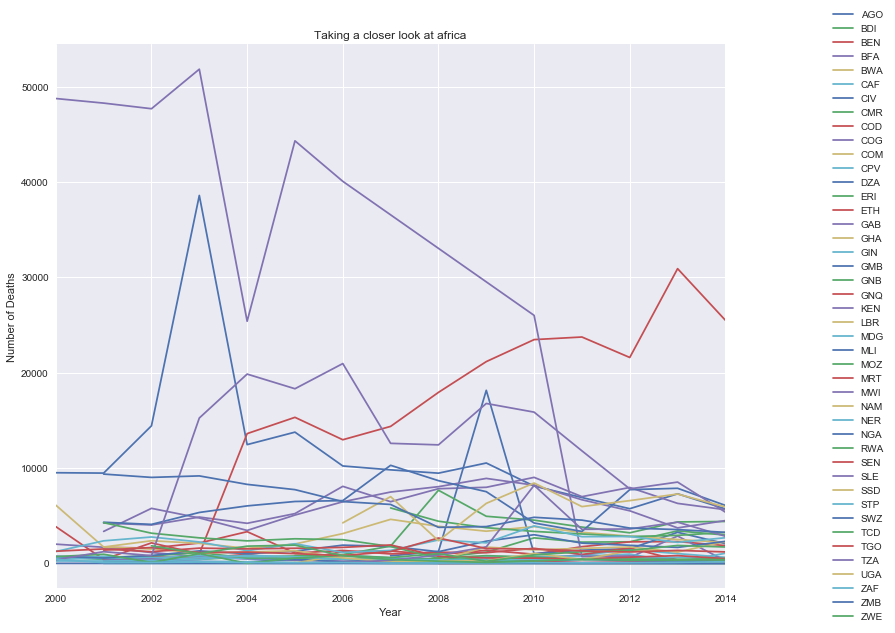

In [114]:
# plotting the african countries
ax1 = None
for group in africa_deaths_by_country.groupby('country_code'):
    ax1 = group[1].plot(x='year', y='reported_deaths', figsize=(12,10), ax=ax1)
ax1.legend(case_countries, loc='center right', bbox_to_anchor=(1.25, 0.5))
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Deaths')
ax1.set_title('Taking a closer look at africa')
plt.show()

In [115]:
# pulling the the countries with the 5 highest mortalities
AFR2014_deaths = africa_deaths_by_country[(africa_deaths_by_country['year'] == 2014)]
print(AFR2014_deaths.sort_values(['reported_deaths'], ascending=False).head(5))

    country_code  year  reported_deaths
118          COD  2014          25502.0
388          NGA  2014           6082.0
519          UGA  2014           5921.0
14           AGO  2014           5714.0
57           BFA  2014           5632.0


## Treatment Resistance Data

In [116]:
resistance.columns

Index(['GHO (CODE)', 'GHO (DISPLAY)', 'GHO (URL)', 'PUBLISHSTATE (CODE)',
       'PUBLISHSTATE (DISPLAY)', 'PUBLISHSTATE (URL)', 'YEAR (CODE)',
       'YEAR (DISPLAY)', 'YEAR (URL)', 'REGION (CODE)', 'REGION (DISPLAY)',
       'REGION (URL)', 'COUNTRY (CODE)', 'COUNTRY (DISPLAY)', 'COUNTRY (URL)',
       'Display Value', 'Numeric', 'Low', 'High', 'Comments'],
      dtype='object')

In [117]:
# renaming columns
resistance = resistance.rename(columns={'YEAR (CODE)':'year',
                                         'REGION (CODE)':'region',
                                          'COUNTRY (CODE)':'country_code',
                                           'Display Value':'tx_resistance',
                                            'COUNTRY (DISPLAY)':'country_name'})
# selecting relvant columns
resistance = resistance[['year', 'country_code','tx_resistance']]

# examining the data
print('Years from:', '', resistance['year'].min(), '-', resistance['year'].max())
print(resistance.isnull().any())
print(resistance.head())
print(resistance.info())


Years from:  2000 - 2015
year             False
country_code     False
tx_resistance    False
dtype: bool
   year country_code tx_resistance
0  2012          BGD           Yes
1  2012          BEN           Yes
2  2011          GHA           Yes
3  2009          KEN           Yes
4  2009          TGO           Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 3 columns):
year             6180 non-null int64
country_code     6180 non-null object
tx_resistance    6180 non-null object
dtypes: int64(1), object(2)
memory usage: 144.9+ KB
None


In [118]:
resistance.drop_duplicates(inplace=True)
resistance.info

<bound method DataFrame.info of       year country_code         tx_resistance
0     2012          BGD                   Yes
1     2012          BEN                   Yes
2     2011          GHA                   Yes
3     2009          KEN                   Yes
4     2009          TGO                   Yes
5     2009          VNM                   Yes
6     2001          IND                   Yes
7     2000          IRN                   Yes
8     2010          YEM                   Yes
9     2011          ZMB                   Yes
10    2008          SEN                   Yes
11    2010          SDN                   Yes
12    2002          AFG   Not tested/reported
13    2006          DZA   Not tested/reported
14    2000          AGO   Not tested/reported
15    2007          BLZ   Not tested/reported
16    2000          BEN   Not tested/reported
17    2004          CAF   Not tested/reported
18    2012          CAF   Not tested/reported
19    2002          DJI   Not tested/reported
20

In [119]:
# Remaping the treatment categories so that '1' will represent treatment resistancfe and '0' will represent no known treatment resistance
resistance_to_int = {'Yes':1,
                      'No':0,
                      'Not tested/reported':0,
                      np.nan:0}
resistance['tx_resistance_int'] = resistance['tx_resistance'].map(resistance_to_int)

## Insect Net Distribution Data

In [120]:
net_dist.columns

Index(['number_llins', 'location', 'country', 'when', 'by_whom',
       'country_code'],
      dtype='object')

In [121]:
# renaming the columns and selecting out relevant colunns
net_dist = net_dist.rename(columns={'number_llins':'number_nets',
                                    'country':'country_name'})
net_dist = net_dist[['when', 'number_nets', 'country_code', 'country_name']]


# Parse out year and add year code column to the 'net_dist'        
net_dist['year'] = '20'+net_dist['when'].str[-2:]
net_year = pd.to_numeric(net_dist['year'], errors='coerce')
net_dist['year'] = net_year


In [122]:
# no need to retain the original column
net_dist = net_dist.drop(['when'], axis=1)


In [123]:
print('Years from:', '', net_dist['year'].min(), '-', net_dist['year'].max())

print(net_dist.isnull().any())
print(net_dist.head())
print(net_dist.info())

Years from:  2006 - 2019
number_nets     False
country_code     True
country_name    False
year            False
dtype: bool
   number_nets country_code country_name  year
0         3000          KEN        Kenya  2006
1         3000          MWI       Malawi  2006
2         3000          NAM      Namibia  2006
3         2000          RWA       Rwanda  2006
4         2000          UGA       Uganda  2006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
number_nets     167 non-null int64
country_code    163 non-null object
country_name    167 non-null object
year            167 non-null int64
dtypes: int64(2), object(2)
memory usage: 5.3+ KB
None


## Population Data

In [124]:
# This population data was pulled from the world bank indicators API
pop.columns

Index(['country_name', 'country_code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014'],
      dtype='object')

In [125]:
pop = pop.melt(id_vars=['country_name', 'country_code'], var_name='year', value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'], value_name='population')


In [126]:
pop['year'] = pd.to_numeric(pop['year'], errors='coerce', downcast='integer')



In [127]:
print(pop.info())
print(pop.head())
print(pop.isnull().any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 4 columns):
country_name    1605 non-null object
country_code    1605 non-null object
year            1605 non-null int16
population      1602 non-null float64
dtypes: float64(1), int16(1), object(2)
memory usage: 40.8+ KB
None
  country_name country_code  year    population
0   Bangladesh          BGD  2000  1.315812e+08
1      Bolivia          BOL  2000  8.339512e+06
2        China          CHN  2000  1.262645e+09
3     Honduras          HND  2000  6.524283e+06
4        Haiti          HTI  2000  8.549200e+06
country_name    False
country_code    False
year            False
population       True
dtype: bool


In [128]:
pop[pop.isnull().any(axis=1)]

,country_name,country_code,year,population
1368,Eritrea,ERI,2012,NaN
1475,Eritrea,ERI,2013,NaN
1582,Eritrea,ERI,2014,NaN


Given  that these are the only 3 values missing from this portion of the data it is unlikely that 3 years from a single country will throw off the correlation much. These values may be obtained from an alternate scource or extrapolated at a later time if necessary.

In [129]:
pop = pop.drop('country_name', axis=1)


# Temperature Data

In [130]:
# This data was pulled from the world bank climate API

temp.columns

Index(['tas', '\tYear', ' Month', ' Country'], dtype='object')

In [131]:
# Altering column labels for preference, clarity, and ease of use
temp = temp.rename(columns={'\tYear' : 'year',
                            ' Country' : 'country_code',
                            'tas' : 'temperature',
                            ' Month' : 'month'})

temp.columns

Index(['temperature', 'year', 'month', 'country_code'], dtype='object')

In [132]:
temp = temp.groupby(['country_code', 'year']).temperature.mean()
temp = temp.reset_index()

print(temp.head())
print(temp.isnull().any())


  country_code  year  temperature
0          ABW  1901    27.642242
1          ABW  1902    27.510883
2          ABW  1903    27.618575
3          ABW  1904    27.399308
4          ABW  1905    27.540717
country_code    False
year            False
temperature     False
dtype: bool


Given that we have 12 monthly values per country per year, for the purposes of this project we will be using the average for the entire year as a representative value for each country in each year. 

# Rainfall

In [133]:
rain.columns

Index(['\tYear', ' Country', ' Month', 'pr'], dtype='object')

In [134]:
# Altering column labels for preference, clarity, and ease of use
rain = rain.rename(columns={'\tYear' : 'year',
                            ' Country' : 'country_code',
                            'pr' : 'rainfall',
                            ' Month' : 'month'})
rain.columns

Index(['year', 'country_code', 'month', 'rainfall'], dtype='object')

In [135]:
rain.head()

,year,country_code,month,rainfall
0,1901,HUN,1,33.2111
1,1901,HUN,2,23.1772
2,1901,HUN,3,56.7961
3,1901,HUN,4,44.8803
4,1901,HUN,5,38.4405


In [136]:
rain = rain.groupby(['country_code', 'year']).rainfall.mean()
rain = rain.reset_index()

print(temp.head())
print(temp.isnull().any())

  country_code  year  temperature
0          ABW  1901    27.642242
1          ABW  1902    27.510883
2          ABW  1903    27.618575
3          ABW  1904    27.399308
4          ABW  1905    27.540717
country_code    False
year            False
temperature     False
dtype: bool


### Percentage of agriculural land

In [137]:
percent_agg.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [138]:
percent_agg = percent_agg.rename(columns={'Country Name' : 'country_name',
                                            'Country Code' : 'country_code'})
percent_agg.columns

Index(['country_name', 'country_code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [139]:
percent_agg = percent_agg.melt(id_vars=['country_name', 'country_code'], var_name='year', value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
                                        value_name='percent_agg')
percent_agg['year'] = pd.to_numeric(percent_agg['year'], errors='coerce', downcast='integer')
percent_agg.head()

,country_name,country_code,year,percent_agg
0,Aruba,ABW,2000,11.111111
1,Afghanistan,AFG,2000,57.827099
2,Angola,AGO,2000,45.961338
3,Albania,ALB,2000,41.751825
4,Andorra,AND,2000,48.936170


### GDP data (GDP per capita)

In [140]:
gdp.columns

Index(['country_name', 'country_code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [141]:
gdp = gdp.melt(id_vars=['country_name', 'country_code'], var_name='year', value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
                                        value_name='gdp_per_cap')
gdp['year'] = pd.to_numeric(gdp['year'], errors='coerce', downcast='integer')
gdp.head()

,country_name,country_code,year,gdp_per_cap
0,Aruba,ABW,2000,20620.700630
1,Afghanistan,AFG,2000,NaN
2,Angola,AGO,2000,555.296942
3,Albania,ALB,2000,1175.788981
4,Andorra,AND,2000,21936.530100


### Population density

In [142]:
pop_density.columns

Index(['country_name', 'country_code', 'country_number', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object')

In [143]:
pop_density = pop_density.melt(id_vars=['country_name', 'country_code'], var_name='year', value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
                                        value_name='pop_density')
pop_density['year'] = pd.to_numeric(pop_density['year'], errors='coerce', downcast='integer')
pop_density.head()

,country_name,country_code,year,pop_density
0,Afghanistan,AFG,2000,30.8
1,Albania,ALB,2000,113.9
2,Algeria,DZA,2000,13.1
3,American Samoa,ASM,2000,287.6
4,Andorra,AND,2000,139.1


### Urban population

In [144]:
urb_pop.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [145]:
urb_pop = urb_pop.rename(columns={'Country Name' : 'country_name',
                                            'Country Code' : 'country_code'})

In [146]:
urb_pop = urb_pop.melt(id_vars=['country_name', 'country_code'], var_name='year', value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
                                        value_name='percent_urb')
urb_pop['year'] = pd.to_numeric(urb_pop['year'], errors='coerce', downcast='integer')
urb_pop.drop('country_name', axis=1, inplace=True)
percent_agg.head()

,country_name,country_code,year,percent_agg
0,Aruba,ABW,2000,11.111111
1,Afghanistan,AFG,2000,57.827099
2,Angola,AGO,2000,45.961338
3,Albania,ALB,2000,41.751825
4,Andorra,AND,2000,48.936170


# Merging for Analysis

In [147]:
# merging the individual file into one
merge_main = [cases, m_deaths, rain, temp, pop, percent_agg, urb_pop, gdp, pop_density]
df_main = reduce(lambda  left,right: pd.merge(left,right,on=['country_code', 'year'], how='left'), merge_main)


In [148]:
df_main = df_main.merge(incidence, on=['country_name_x', 'year'], how='left')

In [149]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1391
Data columns (total 17 columns):
year               1392 non-null object
country_code       1392 non-null object
reported_cases     1392 non-null float64
region_x           1392 non-null object
reported_deaths    1280 non-null float64
region_y           1280 non-null object
rainfall           1387 non-null float64
temperature        1387 non-null float64
population         1389 non-null float64
country_name_x     1392 non-null object
percent_agg        1387 non-null float64
percent_urb        1389 non-null float64
country_name_y     1392 non-null object
gdp_per_cap        1349 non-null float64
country_name       1377 non-null object
pop_density        1377 non-null float64
incidence          1185 non-null float64
dtypes: float64(10), object(7)
memory usage: 195.8+ KB


In [150]:
# dropping missing data
df_main.dropna(inplace=True)
# df_main = df_main[(df_main['reported_deaths'] >= 0)]

In [151]:
# adding the descriptive factor of point prevalence
# df_main['point_prevalence'] = df_main['reported_cases'] / df_main['population']
# df_main = df_main[(df_main['point_prevalence'] >= 0)]

As one target for analysis I will be useing point prevalence (as calculated above). This is due to the fact that accurate and reliable incidence data is notoriously hard to come by. Some exists from global heath organization but it is only calculated every few year and would severely limit the amount of data available for this project. Use of a substitute marker for malaria incidence is common practice (see the supporting documents).

In [152]:
# examining the data
print('Number of years:', '', df_main['year'].nunique())
print('Years from:', '', df_main['year'].min(), '-', df_main['year'].max())
print('Number of countries:', '', df_main['country_code'].nunique())
print(df_main.isnull().any())
print(df_main.info())
df_main.to_csv(path_or_buf='data/df_main.csv')

Number of years:  15
Years from:  2000 - 2014
Number of countries:  90
year               False
country_code       False
reported_cases     False
region_x           False
reported_deaths    False
region_y           False
rainfall           False
temperature        False
population         False
country_name_x     False
percent_agg        False
percent_urb        False
country_name_y     False
gdp_per_cap        False
country_name       False
pop_density        False
incidence          False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 2 to 1390
Data columns (total 17 columns):
year               1075 non-null object
country_code       1075 non-null object
reported_cases     1075 non-null float64
region_x           1075 non-null object
reported_deaths    1075 non-null float64
region_y           1075 non-null object
rainfall           1075 non-null float64
temperature        1075 non-null float64
population         1075 non-null float64
country_name_x     1

In [153]:
# dropping duplicate region column
df_main.drop(['country_name_x', 'country_name_y', 'country_name_x', 'region_y'], axis=1, inplace=True)
df_main.head(10)

,year,country_code,reported_cases,region_x,reported_deaths,rainfall,temperature,population,percent_agg,percent_urb,gdp_per_cap,country_name,pop_density,incidence
2,2013,IRQ,0.0,EMR,0.0,16.434735,21.970021,33883145.0,21.263124,69.262,6925.224046,Iraq,78.0,0.000000e+00
8,2010,TKM,0.0,EUR,0.0,11.641331,16.756224,5087210.0,72.351201,48.402,4439.203000,Turkmenistan,10.8,0.000000e+00
9,2011,UZB,0.0,EUR,0.0,16.376152,12.755088,29339400.0,62.599906,36.173,1564.966945,Uzbekistan,68.3,3.320000e-18
11,2005,TKM,1.0,EUR,0.0,13.724793,16.508073,4754641.0,74.223821,47.048,1704.514750,Turkmenistan,10.1,2.048191e-02
12,2013,TJK,3.0,EUR,0.0,38.393568,4.465917,8177809.0,33.938268,26.621,1040.214412,Tajikistan,58.4,2.190481e-01
13,2010,UZB,3.0,EUR,0.0,14.981083,14.028853,28562400.0,62.693935,36.191,1377.082140,Uzbekistan,67.2,1.110161e-02
15,2008,GEO,6.0,EUR,0.0,68.229933,7.182552,4030000.0,36.177867,52.625,3174.949001,Georgia,62.5,7.320000e-58
16,2010,JAM,12.0,AMR,0.0,309.847967,24.521958,2817210.0,40.997230,53.743,4682.521248,Jamaica,260.1,0.000000e+00
17,2012,SLV,13.0,AMR,0.0,137.059373,24.351867,6221246.0,75.868726,65.287,3827.786267,El Salvador,300.3,9.320000e-33
19,2009,JAM,22.0,AMR,0.0,110.991733,24.940925,2804082.0,41.458910,53.557,4293.322822,Jamaica,258.9,0.000000e+00


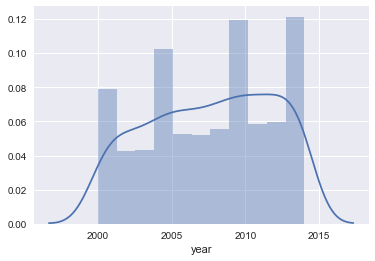

In [154]:
sns.distplot(df_main['year']);

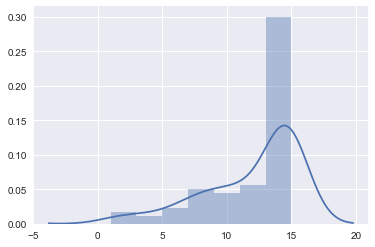

In [155]:
countries = df_main.groupby('country_code').size()
sns.distplot(countries);

In [156]:
countries_year_counts = df_main.groupby(['year'])['country_code'].size()
countries_year_counts

year
2000    48
2001    60
2002    58
2003    59
2004    67
2005    73
2006    72
2007    71
2008    76
2009    80
2010    83
2011    80
2012    82
2013    84
2014    82
Name: country_code, dtype: int64

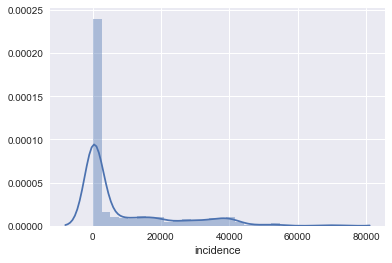

In [157]:
sns.distplot(df_main['incidence']);

In [158]:
# taking a quick look for general trends


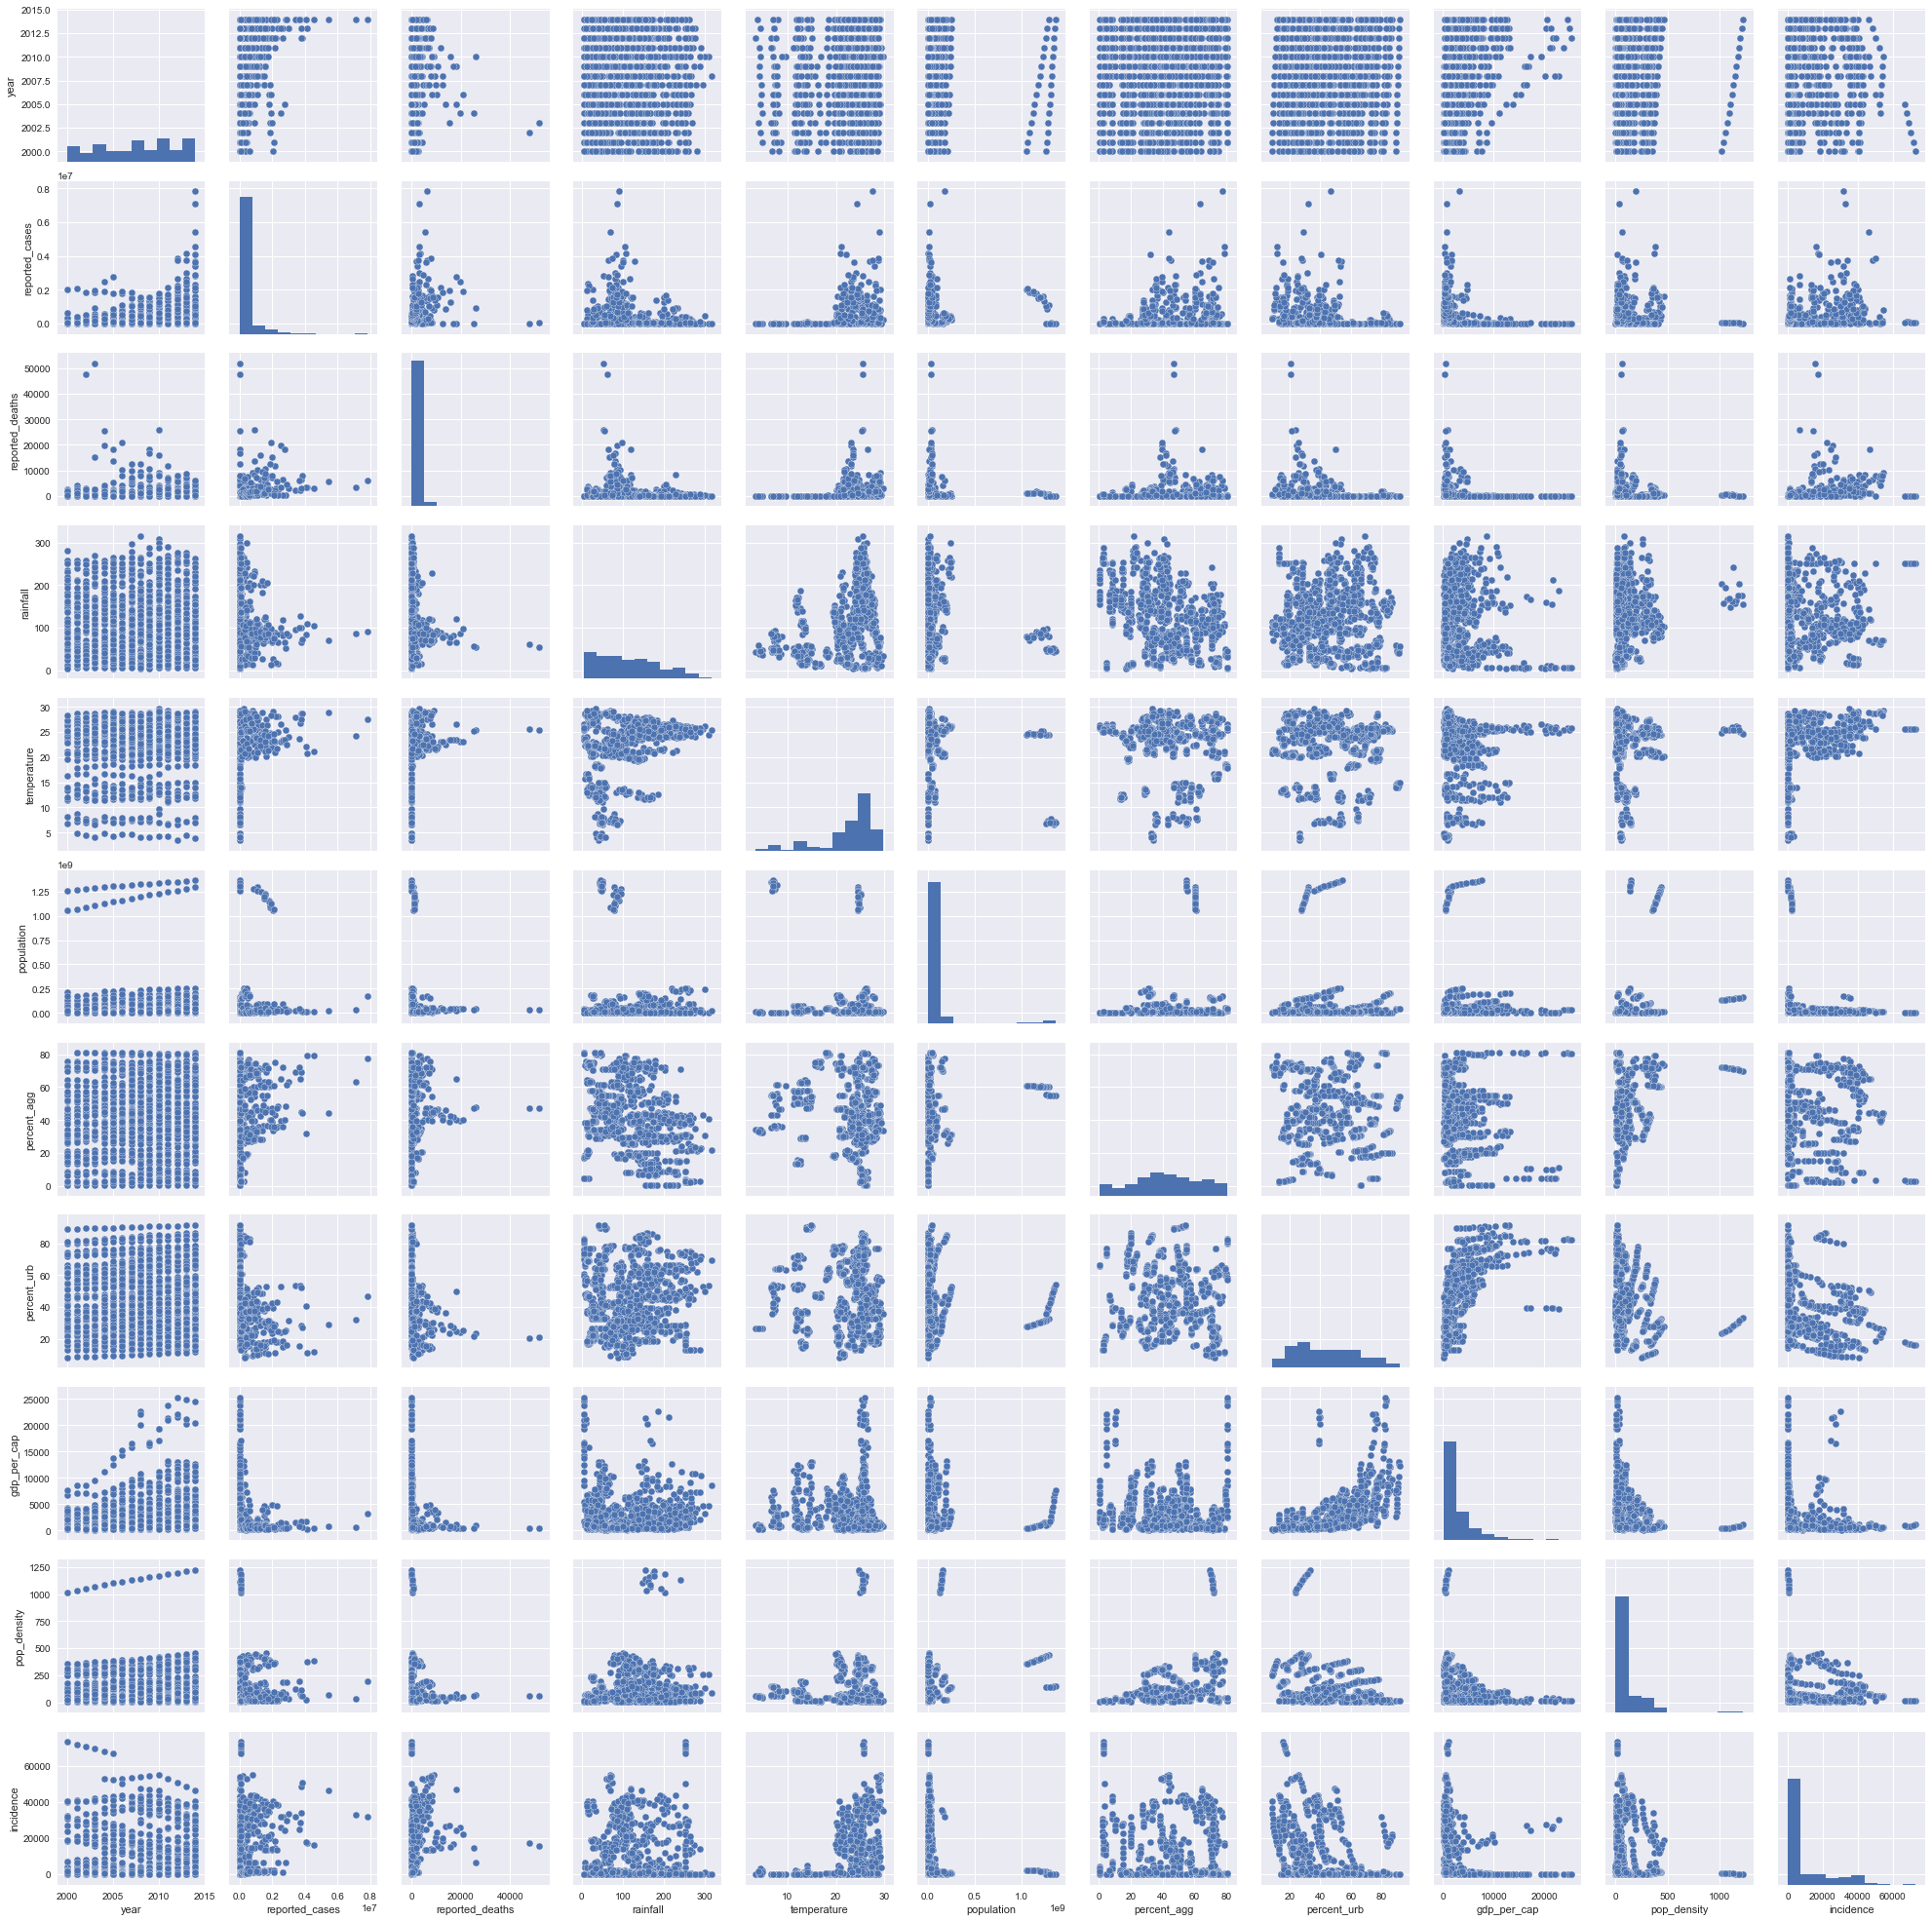

In [159]:
sns.pairplot(df_main);

The df above (df_main) will be the pricipal scource for calculation of various factors and, in the next stage, machine learning. However in keeping with the original idea of this project I would also like to take a look into the inset repellant nets and their effect on the impact of malaria. As stated before this is being done separatly due to the facts that the net distribution data is not as robust as some of the other factors I have available and I would rather have more data point for that exercise. 

However, even though there is not as much data available it is still possible that their might be some interesting insights to be gleaned.

This data frame will be for A/B testing to investigate the effectiveness of inset repellant nets.

### Investigating the nets and insectacide resistance

In [160]:
net_relevant = df_main[['year', 'country_code', 'country_name', 'reported_deaths', 'incidence']]

In [161]:
merge_nets = [resistance, net_dist]

In [162]:
df_nets = reduce(lambda  left,right: pd.merge(left,right,on=['country_code', 'year'], how='left'), merge_nets)

In [163]:
df_nets = df_nets.merge(net_relevant, on=['country_code', 'year'], how='left')

In [164]:
df_nets['number_nets'].fillna(0, axis=0, inplace=True)
df_nets['tx_resistance_int'].fillna(0, axis=0, inplace=True)

In [165]:
print('Number of years:', '', df_nets['year'].nunique())
print('Years from:', '', df_nets['year'].min(), '-', df_nets['year'].max())
print('Number of countries:', '', df_nets['country_code'].nunique())
print(df_nets.isnull().any())
print(df_nets.info())

Number of years:  16
Years from:  2000 - 2015
Number of countries:  98
year                 False
country_code         False
tx_resistance        False
tx_resistance_int    False
number_nets          False
country_name_x        True
country_name_y        True
reported_deaths       True
incidence             True
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2168
Data columns (total 9 columns):
year                 2169 non-null object
country_code         2169 non-null object
tx_resistance        2169 non-null object
tx_resistance_int    2169 non-null float64
number_nets          2169 non-null float64
country_name_x       241 non-null object
country_name_y       1409 non-null object
reported_deaths      1409 non-null float64
incidence            1409 non-null float64
dtypes: float64(4), object(5)
memory usage: 169.5+ KB
None


In [166]:
df_nets.drop(['country_name_x'], axis=1, inplace=True)
df_nets.dropna(inplace=True)

In [167]:
df_nets.head()

,year,country_code,tx_resistance,tx_resistance_int,number_nets,country_name_y,reported_deaths,incidence
0,2012,BGD,Yes,1.0,0.0,Bangladesh,11.0,64.634057
1,2012,BEN,Yes,1.0,0.0,Benin,2261.0,30769.273680
2,2011,GHA,Yes,1.0,1200.0,Ghana,3259.0,35107.925100
3,2011,GHA,Yes,1.0,300.0,Ghana,3259.0,35107.925100
5,2009,TGO,Yes,1.0,0.0,Togo,1556.0,40368.928270


In [168]:
df_nets.to_csv(path_or_buf='data/df_nets.csv')